# Laboratorio 1 - PlayFair  
Por: Felipe Rojas Cendales  
UNAL | Introducción a la criptografía y la seguridad de la información

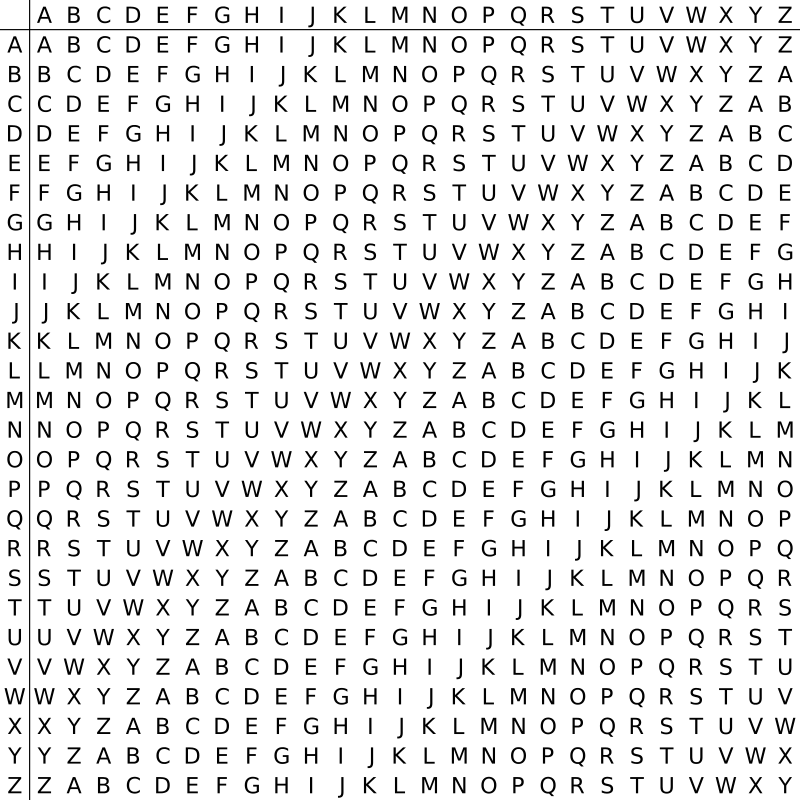

In [1]:
import numpy as np
import re

letters = []
for i in range(65,91): 
  letters.append(chr(i))

def makeVigenereKey(key, msg): 

  #Declaration of array to procedure 
  keyArray = []
    
  if len(key) == len(msg) or len(msg) < len(key):

    #Return key if msg is less or equal lenght
    keyArray = list(key) 
  else: 

    #Add elements of the key
    keyArray = list(key)
    difference = len(msg) - len(key)
    for i in range(0, difference):
      keyArray.append(key[i % len(key)]) 

  return keyArray

def encrypt(vigenereKey, msg): 

  encryptedText = ''

  #Use letters and mod 26 to find corresponding letter, using ord: char to int, implicit vigenere matrix  
  for i in range(0, len(msg)): 
    encryptedText = encryptedText + letters[(ord(msg[i]) + ord(vigenereKey[i])) % 26]
    
  return encryptedText

def decrypt(vigenereKey, msg): 

  decryptedText = ''

  #Use letters and mod 26 to find corresponding letter, using ord: char to int, implicit vigenere matrix, modular substraction requires + value   
  for i in range(0, len(msg)): 
    decryptedText = decryptedText + letters[(ord(msg[i]) - ord(vigenereKey[i]) + 26) % 26]
    
  return decryptedText

def groupByT(msg,t): 

  #Put spaces between the message according to t
  groupedMsg = ''
  for i in range(0, len(msg)):
    groupedMsg = groupedMsg + msg[i]
    if (i % t == 0 and i != 0):
      groupedMsg =  groupedMsg + ' '
  
  return groupedMsg

def vigenere():

  #Receive input, omit spaces, upper it and validate
  key = input('Please, enter your key: ')
  key = key.strip()
  key = key.replace(' ','')
  key = key.upper()
  
  #Check key pattern
  pattern = re.compile('[A-Z]*')
  if pattern.fullmatch(key) == None: 
    return 'Key must be valid without numbers and special characters'

  #Receive message, omit spaces and upper it 
  msg = input('Please, enter your message: ')
  msg = msg.strip()
  msg = msg.replace(' ','')
  msg = msg.upper()

  #Check msg pattern
  if pattern.fullmatch(msg) == None: 
    return 'Message must be valid without numbers and special characters'

  #Receive t and omit spaces 
  t = input('Please, enter the t value (used for grouping):  ')
  t = t.strip()

  #Check t is a number, make it integer
  if t.isdigit() == False: 
    return 'K must be a number value'
  t = int(t)

  #Receive mode 1 to encrypt, 0 to decrypt
  mode = input('Please, enter the program mode (1 to Encrypt, 0 to Decrypt): ')
  mode = int(mode)
  if mode != 1 and mode != 0: 
    return('Invalid mode.') 

  #Generate Vigenere key according to message  
  vigenereKey = makeVigenereKey(key,msg)

  #Encrypt/Decrypt, replace I for I/J and return
  if mode == 1:
    return print('Your message encrypted: ', groupByT(encrypt(vigenereKey, msg), t))
  else: 
    return print('Your message decrypted: ', groupByT(decrypt(vigenereKey, msg), t))
  
vigenere()

Please, enter your key: relations
Please, enter your message: KSMEHZ BBLKS ME
Please, enter the t value (used for grouping):  5
Please, enter the program mode (1 to Encrypt, 0 to Decrypt): 0
Your message decrypted:  TOBEOR NOTTO BE
